# Sentiment Analysis

[1. Sentiment Analysis with Regular Classifier](#1)<br>
[2. Sentiment Analysis with RNN](#2)<br>

# <a id='0'>0: Introduction

Sentiment Analysis (SA) is one of the most popular uses of NLP these days.

SA has become an important tool for many purposes. Some examples are:
* Customer sentiment in a company for financial anaylsis and investment decisions
* Social Media feedback for advertising campaigns
* Quantitative measure for book and movie reviews

This section will be relatively short as the topic is simple once you know classification algorithms. It will have two labs where in each you will train a classifier on movie reviews from the Internet Movie Database (IMDB) dataset.

Labs:
1. Regular supervised learning classifier looking at a review as an unorganized collection of words
2. Exploit the sequentiality of the sentences and will train a more accurate classifier using a Recurrent Neural Network (RNN)

# <a id='1'>1: Sentiment Analysis with Regular Classifier</a>

We will split movies into two segments, positive and negative:

|Review|Sentiment|sentiment_num|
|--|--|:--:|
|"What a great movie!"|positive|1|
|"That was terrible"|negative|0|

You can think of sentiment analysis as a classification or a regression problem depending on the context. If you desire to identify "good or bad", then it is classification, but if you desire to find a more fine grain sentiment value like "4 out of 5 stars", then it can be regression.

In either case, you start with a given corpus (e.g. movie reviews).
1) you process each review as an individual document.
2) you extract a set of features that represents it.
3) pick a classifier (e.g. decision tree, neural network, etc.) dependent on the text representation (e.g. SVM depending on BoW model and RNN depending on word vectors).
4) pick an appropriate loss-function (e.g. cross entropy for classification or MSE for regression).

Put simply:
We'll take a review, e.g. "what a great movie", and we'll extract the words into a One Hot Encoded (OHE) vector:

<img src="assets/images/04/img_001.png" width=700 align='center'>

Then, we'll pass that into our classification algorithm and predict the sentiment:

<img src="assets/images/04/img_002.png" width=700 align='center'>

But now, how do we deal with words that are represented more than once? What if we have a review like: "Great movie, great cast, great experience!" where the words "great" appears 3 times. If we OHE, we only indicate the word "great" is present, not that it is present 3 times. We can instead use the BoW approach!

<img src="assets/images/04/img_003.png" width=700 align='center'>

# 1.1: Lab:

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

### 1.1.1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [1]:
import os
import glob

def read_imdb_data(data_dir='assets/sa/data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        # print(data_type)
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            # print(sentiment)
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [2]:
print(data['train']['pos'][2])

A solid, if unremarkable film. Matthau, as Einstein, was wonderful. My favorite part, and the only thing that would make me go out of my way to see this again, was the wonderful scene with the physicists playing badmitton, I loved the sweaters and the conversation while they waited for Robbins to retrieve the birdie.


And one with a negative sentiment:

In [3]:
print(data['train']['neg'][2])

Ouch! This one was a bit painful to sit through. It has a cute and amusing premise, but it all goes to hell from there. Matthew Modine is almost always pedestrian and annoying, and he does not disappoint in this one. Deborah Kara Unger and John Neville turned in surprisingly decent performances. Alan Bates and Jennifer Tilly, among others, played it way over the top. I know that's the way the parts were written, and it's hard to blame actors, when the script and director have them do such schlock. If you're going to have outrageous characters, that's OK, but you gotta have good material to make it work. It didn't here. Run away screaming from this movie if at all possible.


We can also make a wordcloud visualization of the reviews

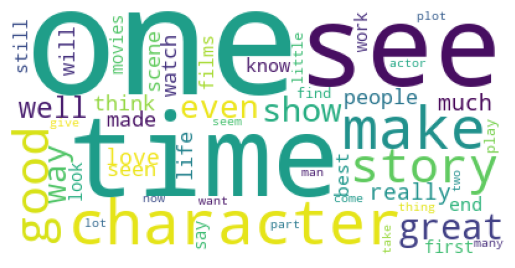

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'pos'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

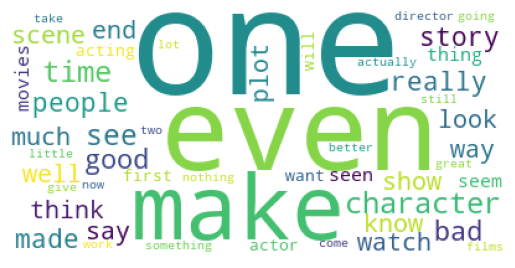

In [5]:
sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [6]:
from sklearn.utils import shuffle

def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels
    data_train = data['train']['pos'] + data['train']['neg']
    data_test = data['test']['pos'] + data['test']['neg']
    labels_train = labels['train']['pos'] + labels['train']['neg']
    labels_test = labels['test']['pos'] + labels['test']['neg']
    
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


### 1.1.2: Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [7]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christopherdaigle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    text = BeautifulSoup(review, "html5lib").get_text()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]

    # Return final list of words
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")
# NOTE: could instead lemmatize and take advantage of earlier POS tagging exercise:
## from nltk.stem import WordNetLemmatizer
#
## lemmatizer = WordNetLemmatizer()
# print("rocks :", lemmatizer.lemmatize("rocks"))
# print("corpora :", lemmatizer.lemmatize("corpora"))
## a denotes adjective in "pos"
# print("better :", lemmatizer.lemmatize("better", pos ="a"))

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [9]:
%%time
import pickle

cache_dir = os.path.join("assets", "sa", "data", "cache")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
I watched to movie today and it just blew my mind away. It is a real masterpiece of art and I don't understand why most of the people think it's garbage. The main idea of the movie - take your ego away and then you will have true power! This was the main battle at the end of the movie and Guy Ritchie has shown that in a magnificent way. "The greatest enemy will hide in the last place you will ever look" - do you remember this from the movie? Because our true enemy is in us - it is our ego... That voice that always tells us that we are important, that gives us our pride, that tells us not to give, but only to take, that creates our aggression, that wants to be in control, that creates all the negative feelings and thoughts. GR expressed this idea in an astonishing way and has shown that the only way to gain true control is when you loose control and you just let go of your personal importance. A superb mov

### 1.1.3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.externals import joblib
import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

In [11]:
def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        #       If not passed a "dummy function", it will implements tokenization of terms with at least 2 characters and 
        #       the pre-processor will strip_accents and lowercase
        #       tokenizer: https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage
        #       preprocessor: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
        vectorizer = CountVectorizer(
            max_features=vocabulary_size,
            preprocessor=lambda x: x,
            tokenizer=lambda x: x)
        features_train = vectorizer.fit_transform(words_train).toarray()

        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.transform(words_test).toarray()
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['pretens', 'soderbergh', 'trivia', 'abl', 'trigger', 'strike', 'buck', 'divorc']

--- Preprocessed words ---
['lame', 'lame', 'lame', '90', 'minut', 'cring', 'fest', '89', 'minut', 'long', 'set', 'ripe', 'atmospher', 'possibl', 'abandon', 'convent', 'squander', 'stinker', 'script', 'fill', 'clunki', 'witless', 'dialogu', 'strain', 'oh', 'hard', 'hip', 'mostli', 'embarrass', 'attempt', 'gonzo', 'horror', 'fall', 'flat', 'sampl', 'movi', 'dialogu', 'demonstr', 'artilleri', 'fast', 'dolli', 'shot', 'closeup', 'barbeau', 'vigilant', 'charact', 'question', 'hyuck', 'hyuck', 'hyuck', 'bad', 'act', 'idiot', 'homophob', 'joke', 'judg', 'creatur', 'effect', 'look', 'like', 'director', 'watch', 'evil', 'dead', 'way', 'mani', 'time', 'owe', 'friend', 'big', 'time', 'rent', 'turkey', 'subject', 'nineti', 'wast', 'minut', 'never', 'get', 'back', 'turd']

--- Bag-of-Words features ---
[0 0 0 ... 0 0 0]

--- Label -

Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

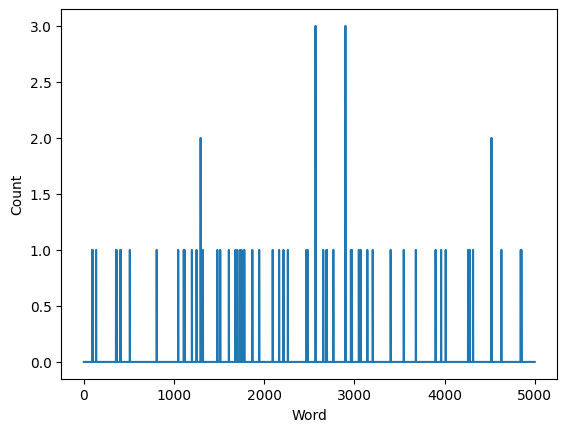

In [12]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [13]:
np.round(1 - np.mean(features_train),4)

0.9784

#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:

97.84% of the entries are zero

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

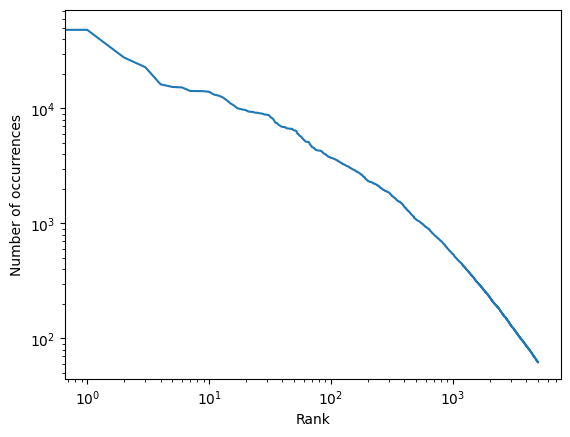

In [14]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot
# plt.plot(range(0,len(word_freq))[::-1])
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

In [15]:
import pandas as pd

In [16]:
vectorizer = CountVectorizer(
    max_features=5000,
    preprocessor=lambda x: x,
    tokenizer=lambda x: x)
matrix = vectorizer.fit_transform(words_train)

In [17]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names_out())

In [18]:
term_rank_df = pd.DataFrame(counts.sum(),columns=['freq_r']).reset_index().rename(columns={'index':'term'}).sort_values('freq_r',ascending=False,ignore_index=True)
term_rank_df.index = term_rank_df.index + 1
term_rank_df['prob_r'] = 100 * term_rank_df['freq_r'] / term_rank_df['freq_r'].sum()
term_rank_df['r_prob_r'] = term_rank_df.index * (term_rank_df['prob_r'] / 100)
mean_r = term_rank_df['r_prob_r'].mean()
std_r = term_rank_df['r_prob_r'].std()
# d = np.polyfit(np.log(term_rank_df.index),np.log(term_rank_df['r_prob_r']),1)
# f = np.poly1d(d)
# term_rank_df['reg'] = f(np.log(term_rank_df.index))

In [19]:
term_rank_df.head()

,term,freq_r,prob_r,r_prob_r
1,movi,51695,1.912484,0.019125
2,film,48190,1.782815,0.035656
3,one,27741,1.026293,0.030789
4,like,22799,0.843461,0.033738
5,time,16191,0.598995,0.029950


In [20]:
print(f"mean:{mean_r}")
print(f"median:{term_rank_df['r_prob_r'].median()}")
print(f"std:{std_r}")

mean:0.15723179048393485
median:0.1524388010635476
std:0.031125962713909487


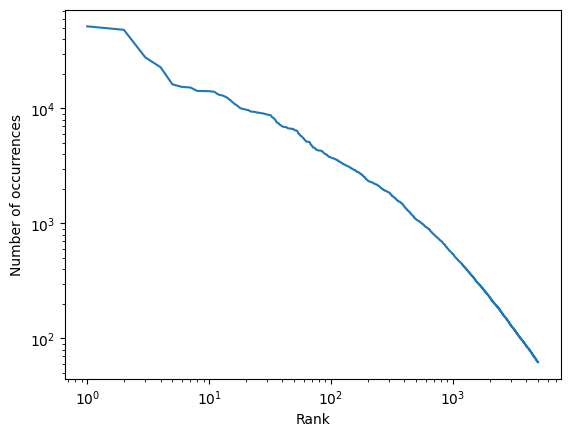

In [21]:
plt.plot(term_rank_df['freq_r'])
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

#### Question: Zipf's law

1. What is the total number of occurrences of the most frequent word?: **51,695**
2. What is the the total number of occurrences of the second most frequent word? **48,190**
3. Do your numbers follow  Zipf's law? If not, why?
>**Not the top few, but the rest, approximately. For the terms at the top and the bottom, Zipf's law has the largest margin of error.<br><br>
To establish that Zip's law holds we need to compute `freq(r)`, which involves computing the frequency of each word and then ranking the words. Then we need to compute `r * freq(r)` and see if `r * freq(r)` is approximately a constant. This does not mean that for all words `r * freq(r)` has to be exactly the same, but it has to be close to the same number for most words. The simplest way to show that Zipf's law holds is to plot the data. Remember that looking at most frequent and least frequent words only is misleading. For those types of words Zipf's law has the highest errors.**


### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [32]:
# features_train[0][features_train[0] > 0]
# list_g_zero = [i for i, x in enumerate(features_train[0] > 0) if x]
# list_g_zero

In [35]:
import sklearn.preprocessing as pr

In [44]:
print(features_train)
print()
print(features_train[0])
print()
print(np.array([i for i, x in enumerate(features_train[0] > 0) if x]))
print()
print(features_train[0][features_train[0] > 0])
print()
print(pr.normalize(features_train[0].reshape(1,-1))[pr.normalize(features_train[0].reshape(1,-1)) >0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[0 0 0 ... 0 0 0]

[   4   93  123  222  283  286  334  394  395  405  442  467  482  489
  510  633  634  658  708  737  791  808  849  907  939  952  960 1043
 1085 1102 1195 1232 1259 1275 1320 1377 1415 1416 1506 1531 1600 1604
 1667 1699 1740 1746 1753 1817 1944 1959 1975 1976 1989 1996 2020 2043
 2091 2107 2136 2155 2226 2285 2305 2322 2343 2358 2388 2511 2523 2577
 2675 2692 2694 2757 2764 2881 2937 2972 2973 2977 3095 3142 3161 3229
 3251 3253 3283 3352 3370 3386 3412 3439 3534 3547 3602 3641 3666 3688
 3866 3876 3881 3923 3924 3930 4001 4012 4044 4076 4098 4120 4134 4233
 4271 4279 4303 4365 4434 4478 4522 4537 4601 4611 4618 4630 4643 4694
 4751 4851 4872 4892 4978]

[1 1 1 2 2 1 1 3 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 2 1 3 1 1 1 1 1 1 2 1 6 1 1 1 2 1 1 1 3 1 1 1 1 1 1 3 1
 1 1 1 5 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 

In [51]:
# TODO: Normalize BoW features in training and test set
features_train_l2norm, features_test_l2norm = (pr.normalize(features_train, axis=1), 
                                 pr.normalize(features_test, axis=1))
mmscale = pr.MinMaxScaler()
features_train_minmax = mmscale.fit_transform(features_train)
features_test_minmax = mmscale.transform(features_test)
stdnorm = pr.StandardScaler()
features_train_zd = stdnorm.fit_transform(features_train)
features_test_zd = stdnorm.transform(features_test)

### 1.1.4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [55]:
from sklearn.naive_bayes import GaussianNB

# TODO: Train a Guassian Naive Bayes classifier
clf = GaussianNB()
input_data = {
    'raw': {'train': features_train,
            'test': features_test},
    'l2': {'train': features_train_l2norm,
           'test': features_test_l2norm},
    'minmax': {'train': features_train_minmax,
               'test':features_test_minmax},
    'stdscale': {'train': features_train_zd,
                 'test': features_test_zd}}
for datum in input_data:
    clf.fit(input_data[datum]['train'],labels_train)
    # Calculate the mean accuracy score on training and test sets
    print(f"[{clf.__class__.__name__} with {datum} input] Accuracy: train = {clf.score(input_data[datum]['train'], labels_train)}, test = {clf.score(input_data[datum]['test'], labels_test)}")

[GaussianNB with raw input] Accuracy: train = 0.7418, test = 0.6532
[GaussianNB with l2 input] Accuracy: train = 0.8198, test = 0.72768
[GaussianNB with minmax input] Accuracy: train = 0.74088, test = 0.65268
[GaussianNB with stdscale input] Accuracy: train = 0.74012, test = 0.65188


Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### TODO: Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=1.0,
    max_depth=3,
    random_state=0)
# input_data = {
#     'raw': {'train': features_train,
#                      'test': features_test},
#              'l2': {'train': features_train_l2norm,
#                      'test': features_test_l2norm},
#              'minmax': {'train': features_train_minmax,
#                      'test':features_test_minmax},
#              'stdscale': {'train': features_train_zd,
#                      'test': features_test_zd}}
for datum in input_data:
    clf.fit(input_data[datum]['train'],labels_train)
    # Calculate the mean accuracy score on training and test sets
    print(f"[{clf.__class__.__name__} with {datum} input] Accuracy: train = {clf.score(input_data[datum]['train'], labels_train)}, test = {clf.score(input_data[datum]['test'], labels_test)}")

[GradientBoostingClassifier with raw input] Accuracy: train = 0.87248, test = 0.83928
[GradientBoostingClassifier with l2 input] Accuracy: train = 0.87632, test = 0.83376
[GradientBoostingClassifier with minmax input] Accuracy: train = 0.87248, test = 0.83928
[GradientBoostingClassifier with stdscale input] Accuracy: train = 0.87248, test = 0.83928


In [63]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(
    # n_estimators=50,
    learning_rate=1.0,
    max_depth=3,
    random_state=0)
# input_data = {
#     'raw': {'train': features_train,
#                      'test': features_test},
#              'l2': {'train': features_train_l2norm,
#                      'test': features_test_l2norm},
#              'minmax': {'train': features_train_minmax,
#                      'test':features_test_minmax},
#              'stdscale': {'train': features_train_zd,
#                      'test': features_test_zd}}
for datum in input_data:
    clf.fit(input_data[datum]['train'],labels_train)
    # Calculate the mean accuracy score on training and test sets
    print(f"[{clf.__class__.__name__} with {datum} input] Accuracy: train = {clf.score(input_data[datum]['train'], labels_train)}, test = {clf.score(input_data[datum]['test'], labels_test)}")

[HistGradientBoostingClassifier with raw input] Accuracy: train = 0.88996, test = 0.84656
[HistGradientBoostingClassifier with l2 input] Accuracy: train = 0.8734, test = 0.83584
[HistGradientBoostingClassifier with minmax input] Accuracy: train = 0.88996, test = 0.84656
[HistGradientBoostingClassifier with stdscale input] Accuracy: train = 0.88996, test = 0.84656


### TODO: Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [64]:
# Borrowing instructor solution example
# TODO: Write a sample review and set its true sentiment
my_review = "I thought it would be just like all the other boring sequels that are coming out everyday. But had I not gone, I would've missed out on a treat. Not only was it not boring, it kept me at the edge of my seat till the end."
true_sentiment = 'pos'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
my_words = review_to_words(my_review)
# vectorizer = CountVectorizer(vocabulary=vocabulary,
#                              preprocessor=lambda x: x,
#                              tokenizer=lambda x: x)  # already preprocessed
# raw
my_bow_features = vectorizer.transform([my_words]).toarray()  # pass an array of 1 element

# TODO: Then call your classifier to label it
predicted_sentiment = clf.predict(my_bow_features)[0]
print("--- My review ---")
print(my_review)
print("\n--- Preprocessed words ---")
print(my_words)
print("\nTrue sentiment: {}, predicted sentiment: {}".format(true_sentiment, predicted_sentiment))

--- My review ---
I thought it would be just like all the other boring sequels that are coming out everyday. But had I not gone, I would've missed out on a treat. Not only was it not boring, it kept me at the edge of my seat till the end.

--- Preprocessed words ---
['thought', 'would', 'like', 'bore', 'sequel', 'come', 'everyday', 'gone', 'would', 'miss', 'treat', 'bore', 'kept', 'edg', 'seat', 'till', 'end']

True sentiment: pos, predicted sentiment: neg


# <a id='2'>2: Sentiment Analysis with RNN</a>